<a href="https://colab.research.google.com/github/alfonso-ASA/CBS-DS-GroupWork/blob/main/California_Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**California housing prices:**

Problem: We have a dataset with multiple variables that can influence the housing prices, is the location, population or income strongly correlated to the housing prices? 

We will look at different variable to try defining what defines higher or lower prices in California.

In [639]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Installs
!pip install pydeck -q
!pip install folium -q

from matplotlib import pyplot as plt #plot control
sns.set() #plot style

from sklearn import datasets, linear_model

#Geoplotting with folium/leaflet
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

I organized all the libraries needed in the top to give a better overview of what is being used to answer our problem statement. When doing the assignment I would import/apply these libraries on the go, as I had to see what tool made more sense to use.

In [640]:
df = pd.read_csv('https://raw.githubusercontent.com/alfonso-ASA/CBS-DS-GroupWork/main/California_House_Pricing.csv')

In [641]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


The data set used has 10 columns and 20640 observations. Nevertheless, there are a few things that need to be drop to make meaninful supervised ML correlations.

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Choosing a data set with both longitute and latitute coordenates was to have the possibility to easily visualize my ML findings.

In [643]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can see that the value **"ISLAND"** has only 5 observations, which will interfere with the other location types that have thousands of observations. Therefore, we drop the "ISLAND" value from the data set.

In [644]:
df.drop(df[df['ocean_proximity']=='ISLAND'].index,inplace = True)

We take all the rows with houses located on "Islands" out of the data frame as the values are very low and won't be useful for future regresion analysis or ML

In [645]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

Looking at the data set, both the **"Median house value"** and **"Median income"** could be interesting values to analyze. Visualizing the "value hist" is useful to see the ranges for these two variables.

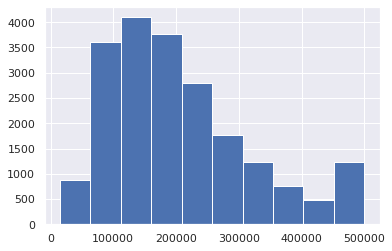

In [646]:
df.median_house_value.hist()

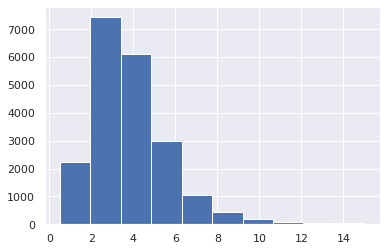

In [647]:
df.median_income.hist()

As we can see from the "Mediam house value" and "Mediam income" histograms, there is some kind of correlation between these two data points it would be interesting to see the correlation between these two to see the correlation distribution.

Therefore, we will look further into the following variables and see how they correlate with each other:

- Median house value
- Median income
- Population
- Ocean proximity (This variable cannot be correlated, as it has no values but categories with TEXT, but will be observed at the end with a Heat Map).

In [648]:
x = df.median_house_value
y = df.median_income
z = df.population

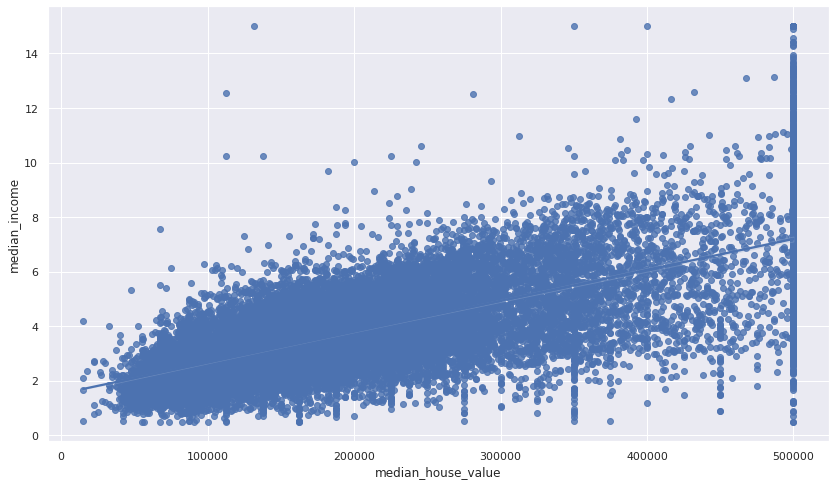

In [649]:
plt.figure(figsize=(14,8))
sns.regplot(x = x, y = y)





Mainly the "Median income" and "Median house value" are the ones where it is easier to see a correlation and why I don't include more graphs from these tests, as they don't seem to be that useful for this test.

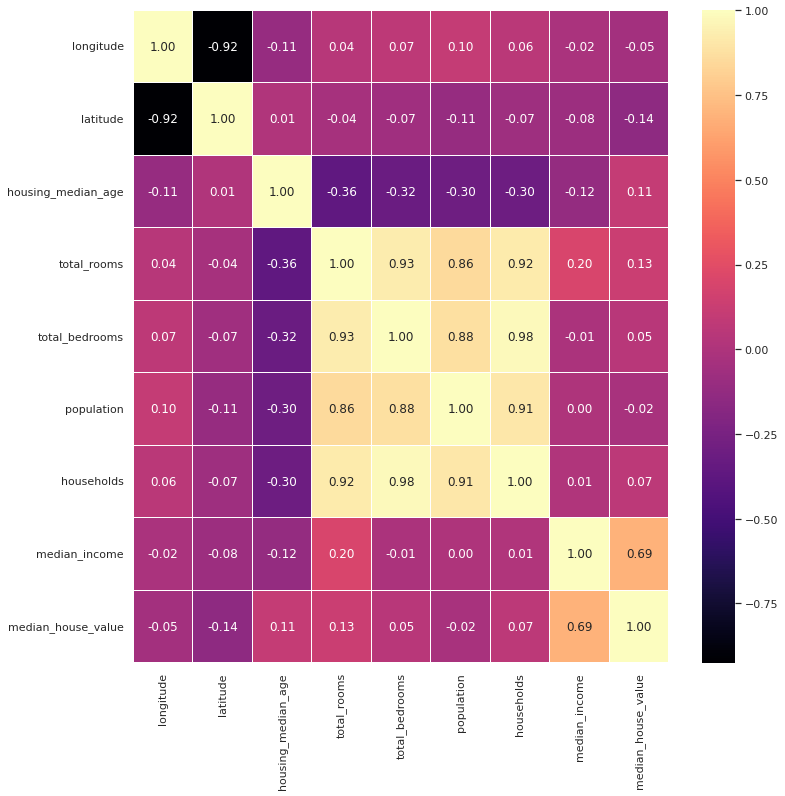

In [650]:
fig,ax = plt.subplots(figsize=(12, 12))   
headmap_plot = sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  
plt.show()

figure = headmap_plot.get_figure()    
figure.savefig('Heatmap.png', dpi=100)

To get a general overview, I decided to also include a "Plot heatmap", where all values are correlated with each other. This gives us a better understanding of wheter the correlations are worth analyzing or not. For instance, there is a big correlation of "Population" and "Total bedrooms", but this correlation will not help us to understand the house pricing differences.

In [651]:
df['median_income'].mean()

3.870943901138842

In [652]:
df['median_house_value'].mean()

206813.75628786042

Now it is time to do some Supervised Machine Learning and see if the previous analyses could help us predict the housing prices.


For doing this, we have to train and test the 3 variables we took in the beginning (income, prices, location and population). We take 1000 values to feed the algorithm for each value.


In [653]:
x=x.values.reshape(len(x),1)
y=y.values.reshape(len(y),1)
z=z.values.reshape(len(z),1)

In [654]:
x_train = x[:-1000]
x_test = x[-1000:]

In [655]:
y_train = y[:-1000]
y_test = y[-1000:]

In [656]:
z_train = z[:-1000]
z_test = z[-1000:]

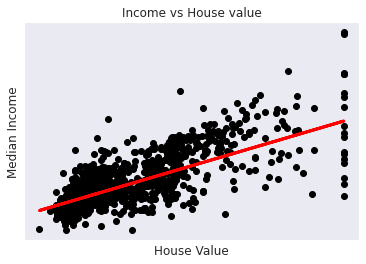

In [657]:
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.title('Income vs House value')
plt.xlabel('House Value')
plt.ylabel('Median Income')
plt.xticks(())
plt.yticks(())

# Create linear regression object
regr = linear_model.LinearRegression()
   
# Train the model using the training sets
regr.fit(x_train, y_train)
   
# Plot outputs
plt.plot(x_test, regr.predict(x_test), color='red',linewidth=3)
plt.show()


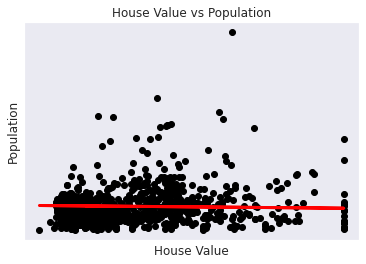

In [658]:
# Plot outputs
plt.scatter(x_test, z_test,  color='black')
plt.title('House Value vs Population')
plt.xlabel('House Value')
plt.ylabel('Population')
plt.xticks(())
plt.yticks(())

# Create linear regression object
regr2 = linear_model.LinearRegression()
   
# Train the model using the training sets
regr2.fit(x_train, z_train)
   
# Plot outputs
plt.plot(x_test, regr2.predict(x_test), color='red',linewidth=3)
plt.show()

After correlating the House Value against the "Population and Income", we can see that the population has almost no correlation with the housing prices, whereas the income does.

# To finalize, we will visualize where the most expensive houses are located and what income do people have (when hovering the mouse on the black plots).


In [659]:
df_s = df.sample(1000)

In [660]:
#Define the map
map = folium.Map(location=[36.787, -122.018],  zoom_start=6)

#add prettier base-layer
folium.TileLayer('cartodbpositron').add_to(map)

#add points (in a loop)
for j in df_s.iterrows():
    marker= folium.Circle(
        radius=30,
        location=[j[1]['latitude'], j[1]['longitude']],
        tooltip=j[1]['median_income'],
        popup=f"<b>{j[1]['median_house_value']}</b>\n {j[1]['median_house_value']}",
        color='black',
        fill=True
    ).add_to(map)

#adding heatmap layer
locations = zip(df_s['latitude'], df_s['longitude'])
HeatMap(locations).add_to(map)

In [661]:
map

**We can say that the most expensives houses are close to the ocean and also to the biggest cities of San Francisco and Los Angeles. At the same time, these locations contain the people with the highest income.**

**If we go further out from these two cities and the ocean, both the income and housing prices decrease.**